## IBM Machine Learning
### Course 1: Exploratory Data Analysis

#### 1. Introduction
The dataset contains the prices and other attributes of almost 54000 diamonds. The dataset can be found in kaggle website:  https://www.kaggle.com/shivam2503/diamonds?select=diamonds.csv

#### 2. EDA 
Firstly, I will inspect coulmns of this dataset to check the datatype. For numeric data, I will assess the distribution and perform transformation if needed. For categorical data, one hot encoding will be performed.
New attribute may be created.

##### 2.1 Load the packages and data

In [107]:
import pandas as pd
import numpy as np

filepath='data/diamonds.csv'

data=pd.read_csv(filepath, index_col=0)

##### 2.2 Data Description

In [108]:
## size of data
data.shape
## There are 53940 records

(53940, 10)

In [109]:
## column names
data.columns.tolist()
## the features of each diamond

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [110]:
## first few records
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [111]:
## the datatype of each column
data.info()
## There are three columns of categorical variables and seven columns of numeric variable
## There is no missing value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [112]:
##numeric data description
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [113]:
## categorical data
cat_cols=data.dtypes[data.dtypes==np.object].index.tolist()
for col in cat_cols:
    print(data[col].value_counts().sort_index())

Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: cut, dtype: int64
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
Name: color, dtype: int64
I1        741
IF       1790
SI1     13065
SI2      9194
VS1      8171
VS2     12258
VVS1     3655
VVS2     5066
Name: clarity, dtype: int64


##### 2.3 Create new feature of price_per_carat

In [114]:
## derive the variable price per carat
data['price_per_carat']=data['price']/data['carat']

In [115]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


#### 3. Visulization of all features

##### 3.1 Carat

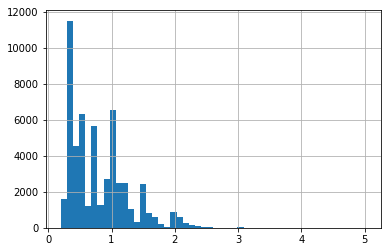

In [116]:
## The distribution of carat
data.carat.hist(bins=50)
##most of diamonds have the carat of 0 to 1

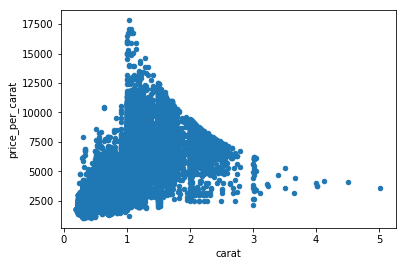

In [117]:
## carat versus price_per_carat
data.plot.scatter(x='carat', y='price_per_carat')
## the diamond around 1 carat have the highest unit price per carat

##### 3.2 cut

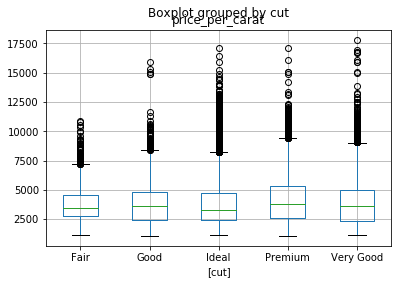

In [118]:
##cut versus price_per_unit
data[['cut','price_per_carat']].boxplot(by='cut')
## premium diamond have the highest unit price

##### 3.3 color

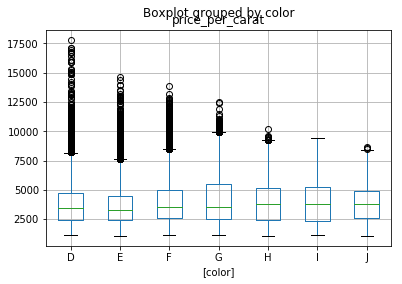

In [119]:
##color versus unit per carat
data[['color','price_per_carat']].boxplot(by='color')

In [120]:
## diamond of color D have the widest range of unit price
## the highest unit price for each color level decreases ad the color gets worse

##### 3.4 Clarity

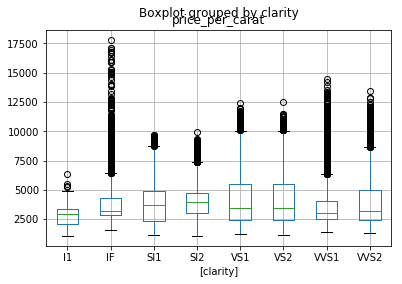

In [121]:
##clarity versus unit per carat
data[['clarity','price_per_carat']].boxplot(by='clarity')

In [122]:
## diamond of calrity IL have the widest range of unit price
## the highest unit price for each clarity level decreases ad the clarity gets worse

##### 3.5 depth

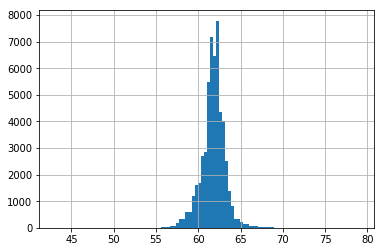

In [123]:
## The distribution of depth
data.depth.hist(bins=100)
##most of diamonds have the carat of 60 to 65

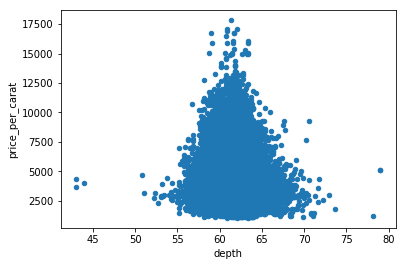

In [124]:
## depth versus price_per_carat
data.plot.scatter(x='depth', y='price_per_carat')

In [125]:
## diamonds of depth at the range of 60-65 are more valuable

##### 3.6 volume

In [126]:
## carete new feature 'volume'
data['volume']=data['x']*data['y']*data['z']

(0, 500)

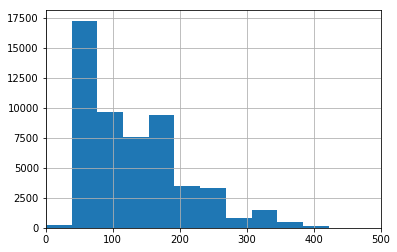

In [127]:
## The distribution of volume
data.volume.hist(bins=100).set_xlim((0,500))

(0, 500)

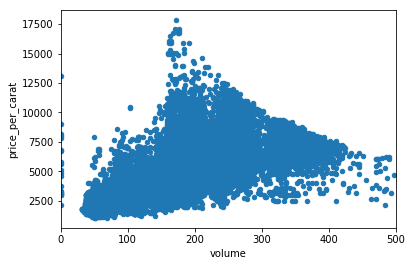

In [128]:
## volume versus price_per_carat
data.plot.scatter(x='volume', y='price_per_carat').set_xlim((0,500))
## the diamond around 200 mm^3 have the highest price per carat

#### 4. Findings and hypothesis

#### 4.1 carat 

Although the price of diamonds increase as the carat increases, those dimonds weigh around 1 carat have the highest price per carat. It may be due to the high demand of 1 carat diamond in the market.

##### 4.2 cut

The dimonds of ideal, premium and very good cut have the highest price per carat. The diamonds of fair cut are less valuables compare to other others. we may hypothesize that the mean price per carat for fair cut is significantly lower than the rest of diamonds.

##### 4.3 color

It's no surprise that the value of diamond (price per carat) decrease as the color get faint and yellowish

##### 4.4 calrity

It's no surprise that the value of diamond (price per carat) decrease as the clarity get worse

#### 5. Hypothesis testing

In [129]:
from scipy.stats import ttest_ind

## price per carat for dimonds above fair cut
price1=data[data.cut!="Fair"].price_per_carat

In [130]:
## price per carat for dimonds of fair cut
price2=data[data.cut=="Fair"].price_per_carat

In [131]:
ttest_ind(price1, price2, equal_var=False)

Ttest_indResult(statistic=6.308977889651941, pvalue=3.5338670294345153e-10)

The p value is 3.53e-10, which means the price per carat for diamonds of fair cut is significantly lower than others